# Exploración de datos

In [1]:
import sys
import os
from functools import reduce

project_path = os.path.abspath('../..')
sys.path.insert(1, project_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="darkgrid")

from src.utils import get_project_root
from src.data.make_dataset import get_minma_data

## CEMS

### Carga de datos 

In [7]:
cems_df = pd.read_excel(get_project_root() / 'data' / 'raw' / 'CEMS industrial datos Quintero.xlsx', header=2).set_index('date')

In [8]:
cems_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27711 entries, 2019-08-01 01:00:00 to 2022-09-28 15:00:00
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CEMS U1 Ventanas           12388 non-null  float64
 1   CEMS U2 Ventanas           16786 non-null  float64
 2   CEMS U3 Ventanas           18760 non-null  float64
 3   CEMS U4 Ventanas           19586 non-null  float64
 4   CEMS Chimenea Codelco      15021 non-null  float64
 5   CEMS Planta Acido Codelco  19703 non-null  float64
dtypes: float64(6)
memory usage: 1.5 MB


### Conteo de datos

In [39]:
def df_counts(data):
        """Redefine la operación + entre imagen y escalar.

        # Idea, usar indexado condicial (similar a los filtros de pandas).
        # Sumar y luego que en cada pixel mayor a 255 sea asignado el máximo.
        # Ver los tests para mas información.

        Parameters
        ----------
        other : Union[int, np.ndarray]
            Escalar o arreglo que será sumado a cada pixel de la imagen
        """    
    df = pd.concat([data.count(), data.isna().sum()], axis=1)
    expected_dates = pd.date_range(data.index[0], data.index[-1], freq='H').shape[0]
    df.columns = ['N° datos', 'N° datos nulos']
    df['N° datos esperados'] = expected_dates
    df['Porcentaje de datos respecto al esperado'] = (100 * df['N° datos'] / df['N° datos esperados']).round(2)
    return df

In [40]:
df_counts(cems_df)

,N° datos,N° datos nulos,N° datos esperados,Porcentaje de datos respecto al esperado
CEMS U1 Ventanas,12388,15323,27711,44.70
CEMS U2 Ventanas,16786,10925,27711,60.58
CEMS U3 Ventanas,18760,8951,27711,67.70
CEMS U4 Ventanas,19586,8125,27711,70.68
CEMS Chimenea Codelco,15021,12690,27711,54.21
CEMS Planta Acido Codelco,19703,8008,27711,71.10


### Visualización inicial

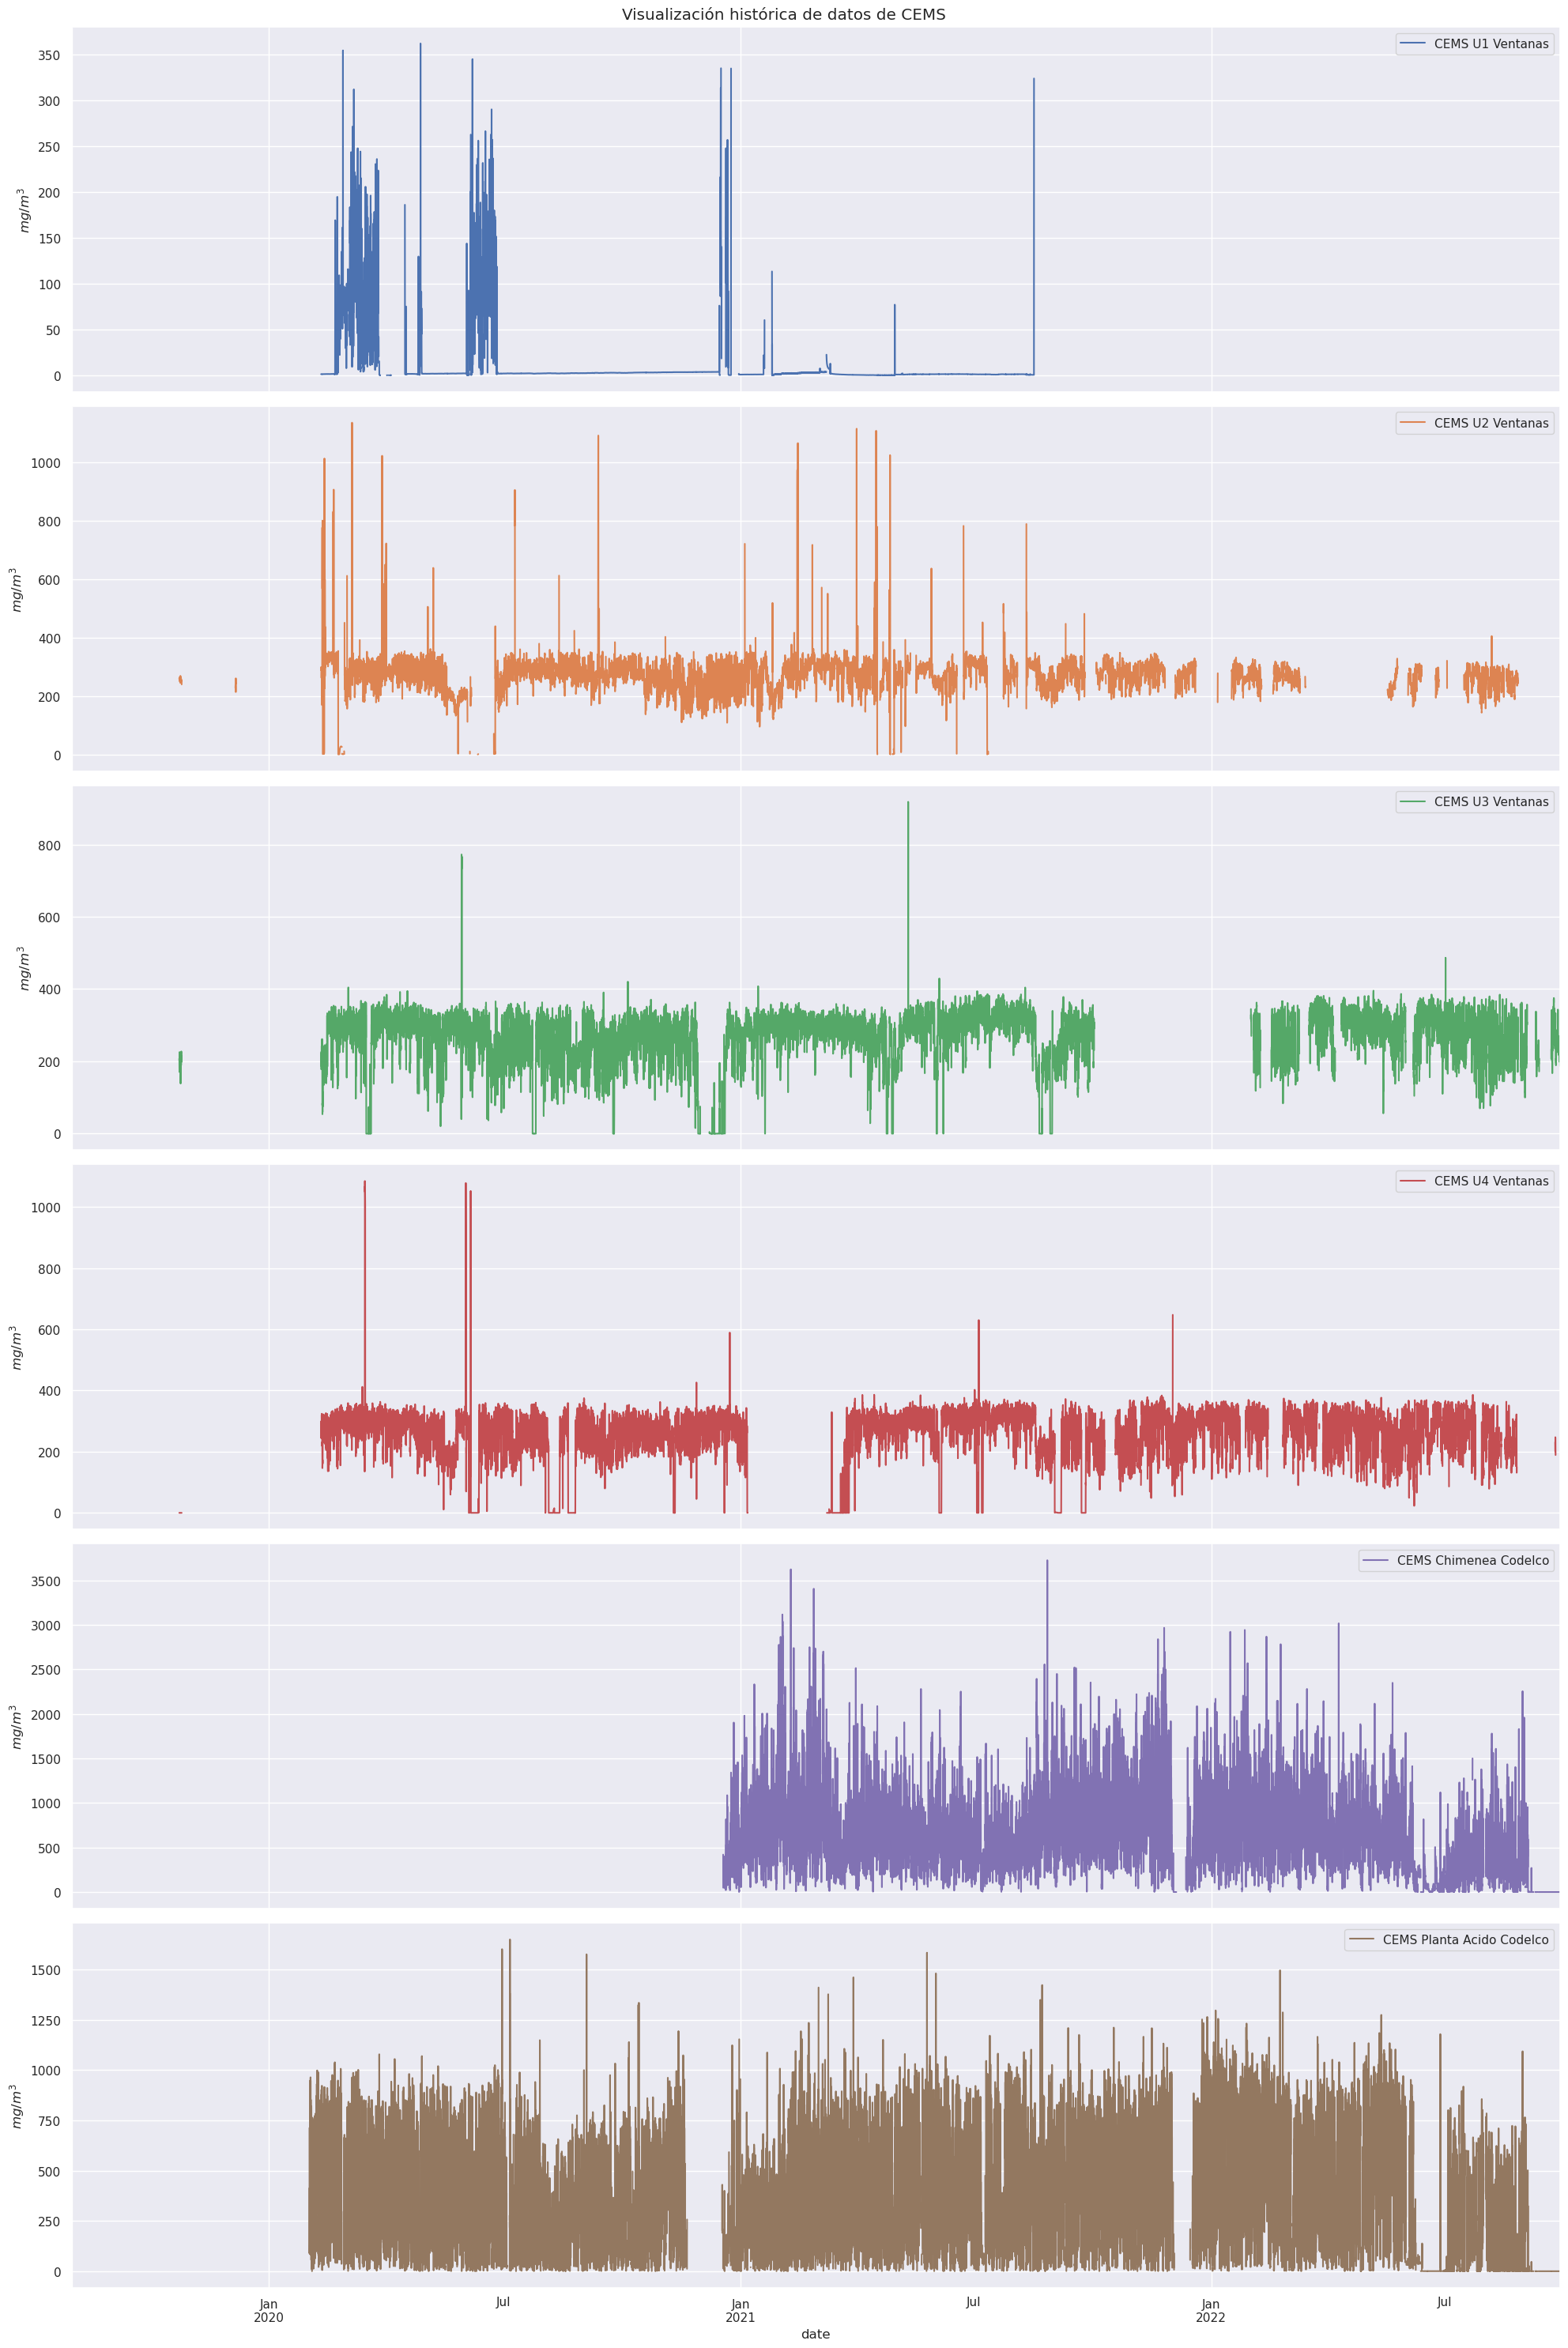

In [54]:
cems_df[['CEMS U1 Ventanas', 'CEMS U2 Ventanas', 'CEMS U3 Ventanas',
        'CEMS U4 Ventanas', 'CEMS Chimenea Codelco', 'CEMS Planta Acido Codelco']].plot(figsize=(20,30), subplots=True, ylabel=r'$mg/m^3$')
plt.suptitle('Visualización histórica de datos de CEMS', y=0.99)
plt.tight_layout()
plt.show()

In [86]:
cems_df

,CEMS U1 Ventanas,CEMS U2 Ventanas,CEMS U3 Ventanas,CEMS U4 Ventanas,CEMS Chimenea Codelco,CEMS Planta Acido Codelco
date,,,,,,
2019-08-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-09-28 11:00:00,NaN,NaN,247.376,NaN,0.0,0.0
2022-09-28 12:00:00,NaN,NaN,243.106,NaN,0.0,NaN
2022-09-28 13:00:00,NaN,NaN,227.068,NaN,NaN,NaN


- Se observan grandes vacíos para todas las chimeneas.´
- A pesar de que según la base de datos las mediciones parten desde el 01-08-2019, existen datos efectivos de la Planta Acido Codelco desde el 01-02-2020 y para el resto de las chimeneas con excepción de la chimenea de Codelco desde el 10-02-2020, y finalmente para la última mencionada, desde enero 2021.

### Distribución de datos

In [61]:
cems_df.describe()

,CEMS U1 Ventanas,CEMS U2 Ventanas,CEMS U3 Ventanas,CEMS U4 Ventanas,CEMS Chimenea Codelco,CEMS Planta Acido Codelco
count,12388.000000,16786.000000,18760.000000,19586.000000,15021.000000,19703.000000
mean,12.553066,266.664728,267.960240,254.333037,628.224463,359.028793
std,35.598075,62.860692,76.038918,89.209258,447.889732,282.253395
min,0.025691,0.072111,0.000000,0.000000,0.000000,0.000000
25%,1.071545,237.723750,231.588250,216.972250,310.120000,97.883150
50%,1.971170,274.011500,287.927500,279.314500,568.606000,327.583000
75%,3.053872,301.451000,318.527500,315.101500,874.874000,579.797000
max,361.922000,1136.140000,917.834000,1084.550000,3727.310000,1648.650000


### Cantidad de datos por fecha

In [193]:
cems_df['year'] = cems_df.date.apply(lambda x: x.year)
cems_df['month'] = cems_df.date.apply(lambda x: x.month)
cems_df['hour'] = cems_df.date.apply(lambda x: x.hour)

#### Anual

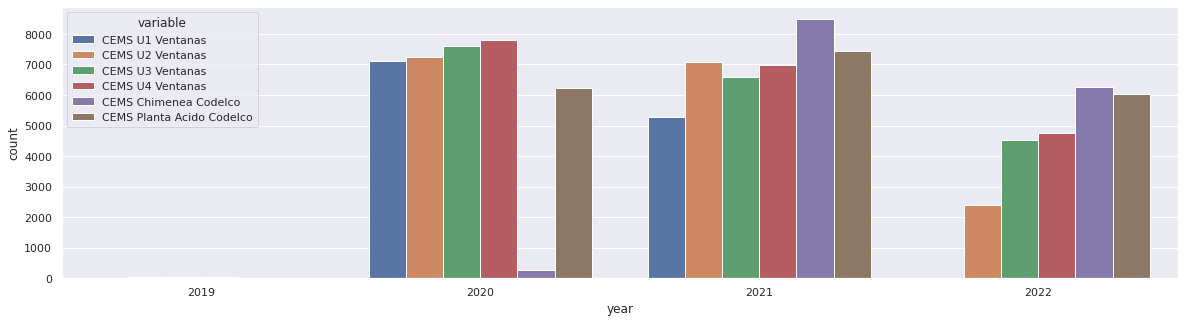

In [194]:
fig, ax = plt.subplots(figsize=(20,5))

sns.countplot(cems_df.melt(id_vars=['year', 'month','hour'], value_vars=cems_df.columns[1:-3]).dropna(), x='year', hue='variable', ax=ax)
plt.show()

- No existe mucha constancia en los datos de cada chimenea.
- Para U1 Ventanas hay datos principalmente en el año 2021, mientras que en el 2020 es casi nulo y en 2022 es nulo.

### Lag plots

#### 1 hora

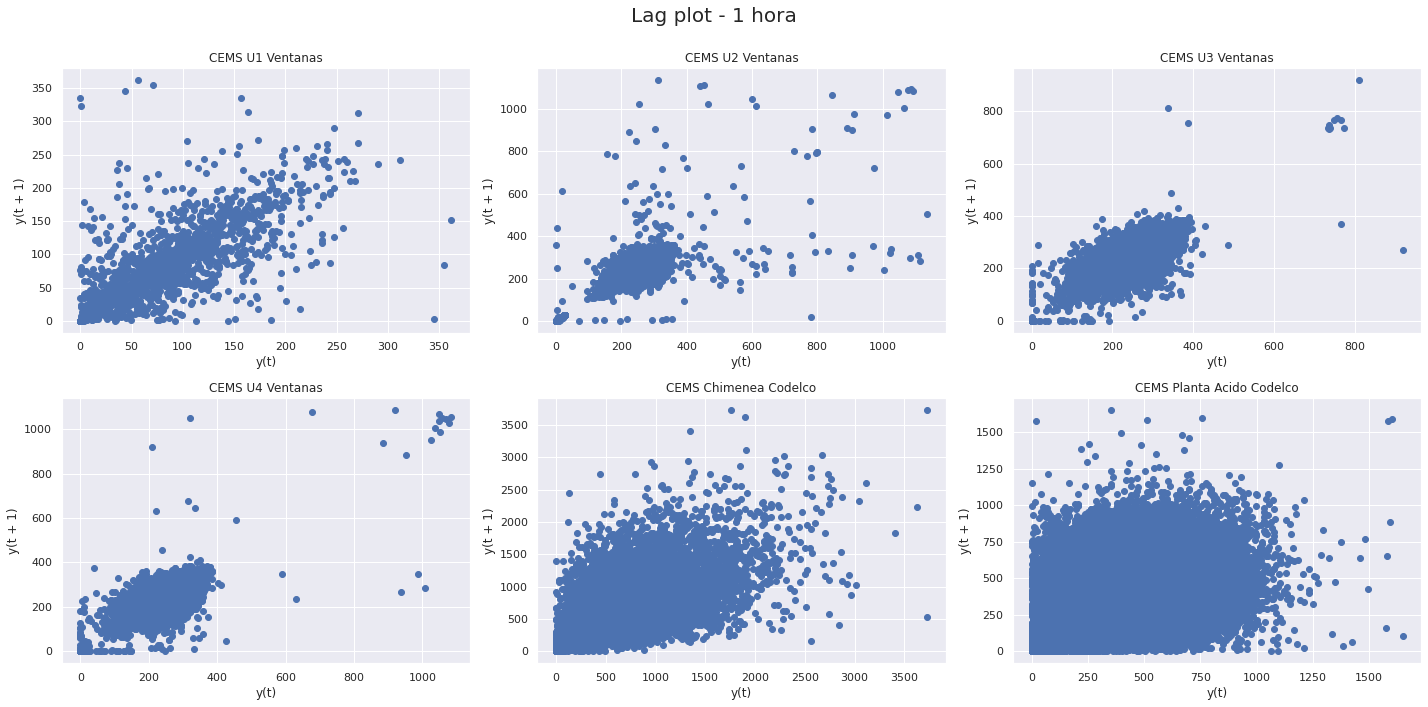

In [258]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))

for idx, col in enumerate(['CEMS U1 Ventanas', 'CEMS U2 Ventanas', 'CEMS U3 Ventanas', 'CEMS U4 Ventanas', 'CEMS Chimenea Codelco', 'CEMS Planta Acido Codelco']):
    pd.plotting.lag_plot(cems_df[col], lag=1, ax=ax[idx//3, idx%3])
    ax[idx//3, idx%3].set_title(col)

fig.suptitle('Lag plot - 1 hora', fontsize=20)
fig.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

#### 1 día

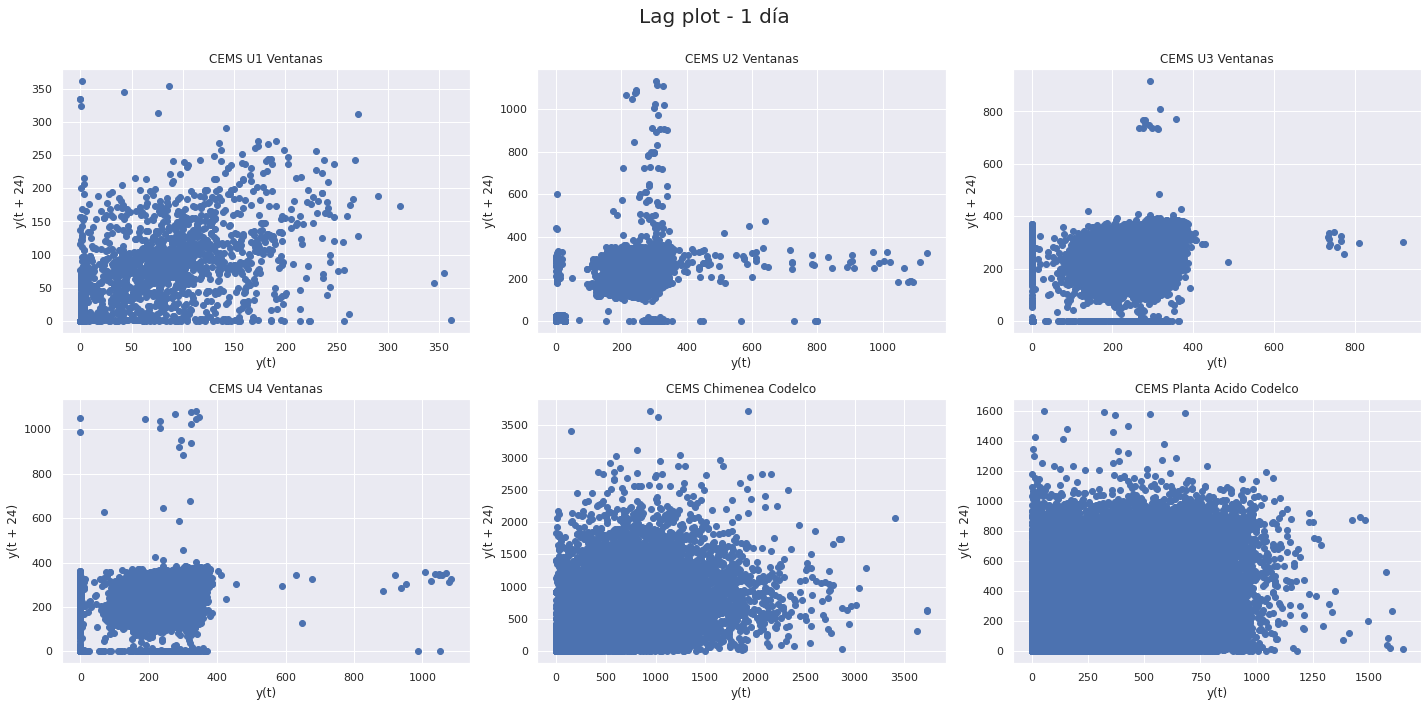

In [260]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))

for idx, col in enumerate(['CEMS U1 Ventanas', 'CEMS U2 Ventanas', 'CEMS U3 Ventanas', 'CEMS U4 Ventanas', 'CEMS Chimenea Codelco', 'CEMS Planta Acido Codelco']):
    pd.plotting.lag_plot(cems_df[col], lag=24, ax=ax[idx//3, idx%3])
    ax[idx//3, idx%3].set_title(col)

fig.suptitle('Lag plot - 1 día', fontsize=20)
fig.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Scatter plot

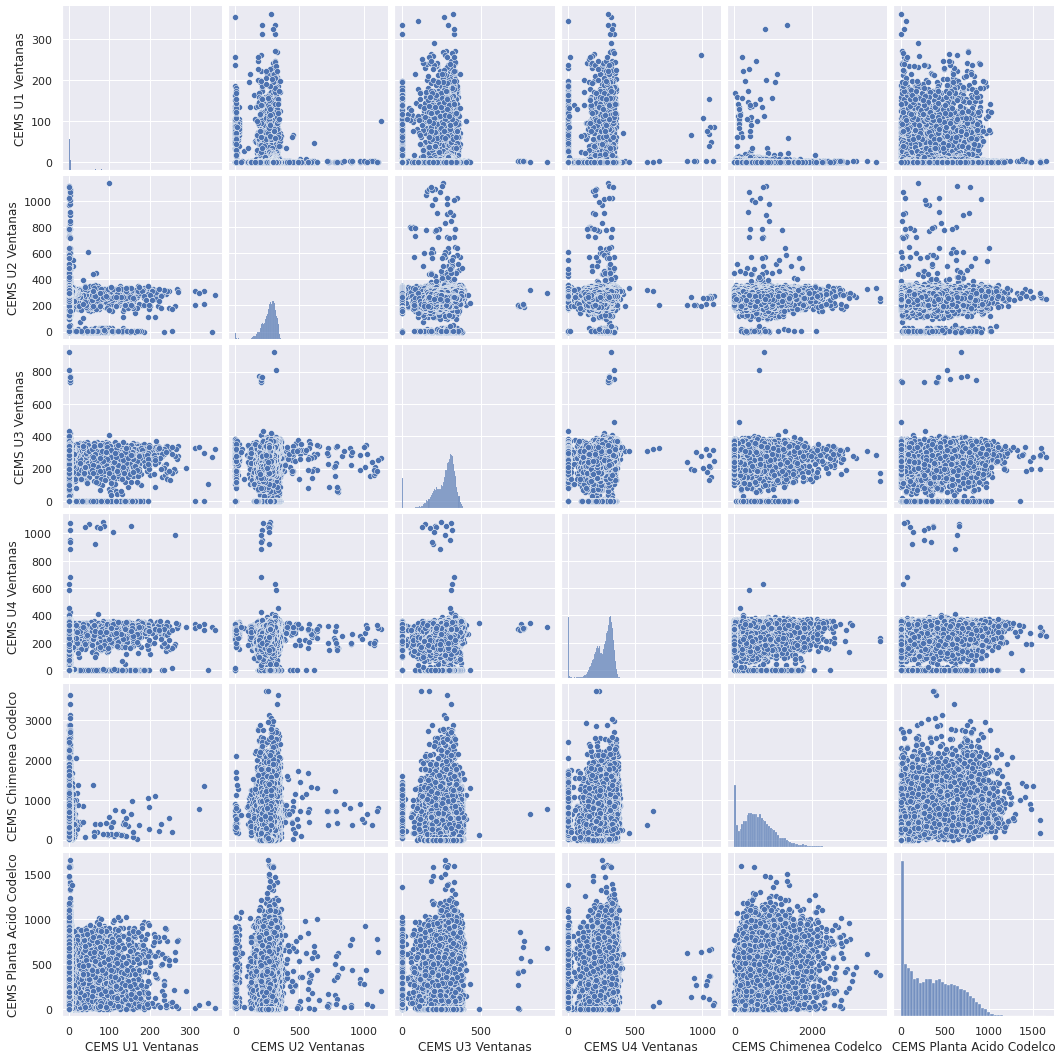

In [255]:
sns.pairplot(cems_df[['CEMS U1 Ventanas', 'CEMS U2 Ventanas', 'CEMS U3 Ventanas', 'CEMS U4 Ventanas', 'CEMS Chimenea Codelco', 'CEMS Planta Acido Codelco']])
plt.show()

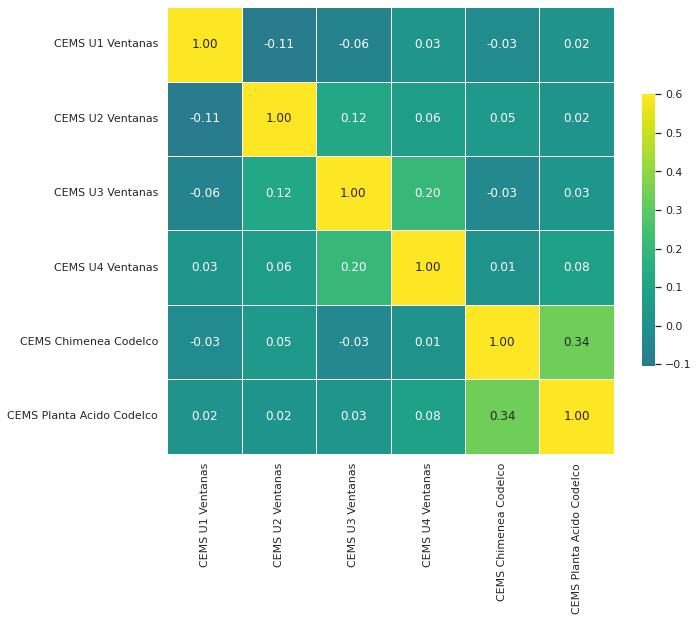

In [256]:
cems_corr = cems_df[['CEMS U1 Ventanas', 'CEMS U2 Ventanas', 'CEMS U3 Ventanas', 'CEMS U4 Ventanas',
                    'CEMS Chimenea Codelco', 'CEMS Planta Acido Codelco']].corr(method='pearson')

g = sns.heatmap(cems_corr,  vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='viridis')
g.figure.set_size_inches(10,10)
    
plt.show()